# Basic setup trial #

 ##### Import the necessary libraries 

In [2]:
import numpy as np 
from scipy.io import wavfile
import IPython
import matplotlib.pyplot as plt
import pyroomacoustics as pra

 ##### Configure the room setup

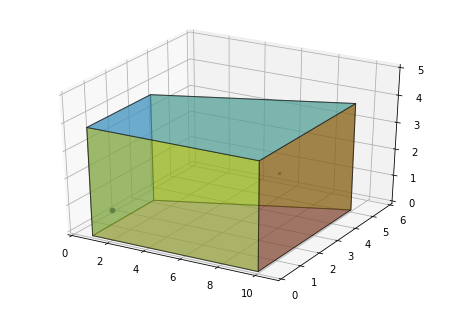

In [30]:
fs, signal = wavfile.read("test1.wav")

corners = np.array(([1, 0], [1,3], [10,5],[10,0])).T
room = pra.Room.from_corners(corners, fs=fs, max_order = 4, absorption=0.2)
room.extrude(4)

room.add_source([1,1,0.5], signal=signal)
R = np.array([[8],[3],[2]])
room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

# Visualize setup
fig, ax = room.plot()
ax.set_xlim([0, 11])
ax.set_ylim([0, 6])
ax.set_zlim([0, 5]);

 ##### Use the image source model to compute the RIR

C-extension libroom unavailable. Falling back to pure python


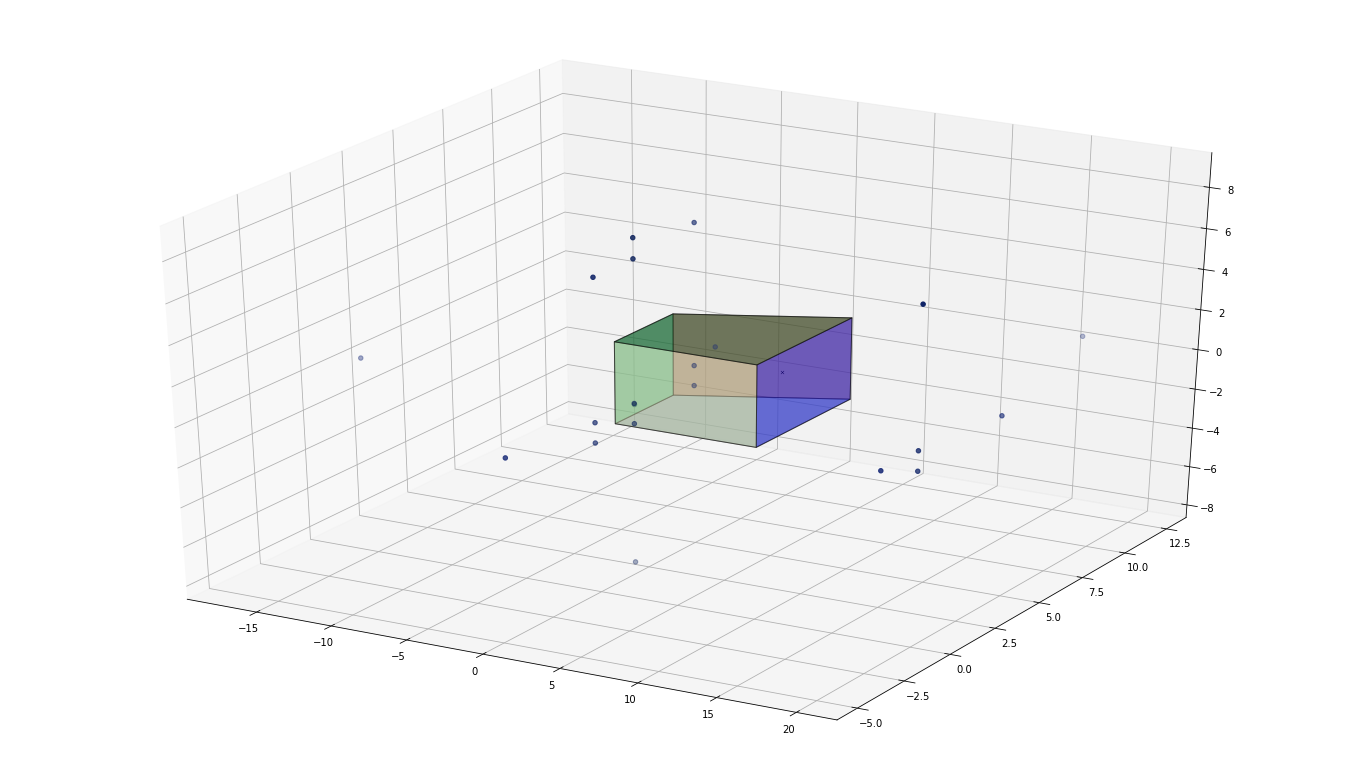

In [31]:
room.image_source_model(use_libroom=True)
room.simulate()

fig, ax = room.plot(img_order=2)
fig.set_size_inches(18.5, 10.5)

##### Plot the RIR

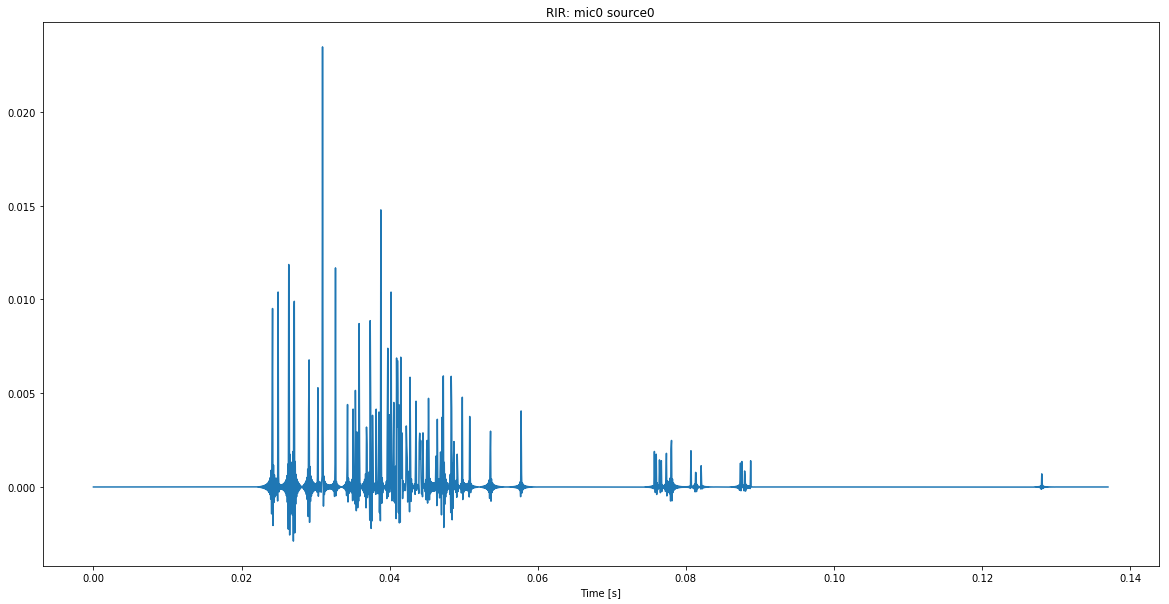

In [34]:
room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(20, 10)

 ##### Input audio (from source)

In [46]:
IPython.display.Audio(signal, rate=fs)


##### Output audio at microphone (convolution of input signal with RIR)

In [43]:
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)